In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Step 1: Load Dataset and Normalize Features
We'll load the Iris dataset and then normalize its features. Normalization is crucial for KNN because it's a distance-based algorithm; we need to ensure all features are on the same scale.  For easy visualization of the decision boundaries later, we will use only the first two features (Sepal Length and Sepal Width).

In [2]:
# Load the Iris dataset
iris = load_iris()
# Using only the first two features for visualization purposes
X = iris.data[:, :2] 
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dataset loaded and features normalized successfully.")

Dataset loaded and features normalized successfully.


## Step 2: Use KNeighborsClassifier
Now, let's train a basic KNN model using the 

KNeighborsClassifier from Scikit-learn.  We'll start with a common value for K, such as K=5.

In [3]:
# Create and fit a KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("KNN model with K=5 fitted successfully.")

KNN model with K=5 fitted successfully.


## Step 3: Experiment with Different Values of K
The choice of K can significantly impact the model's performance. We'll experiment with different values to find the optimal one.  A common way to do this is to plot the model's accuracy for a range of K values.

Interpretation: The plot helps you find the "elbow" or the point where the accuracy is highest. Based on the plot, you can choose the best K for your final model.

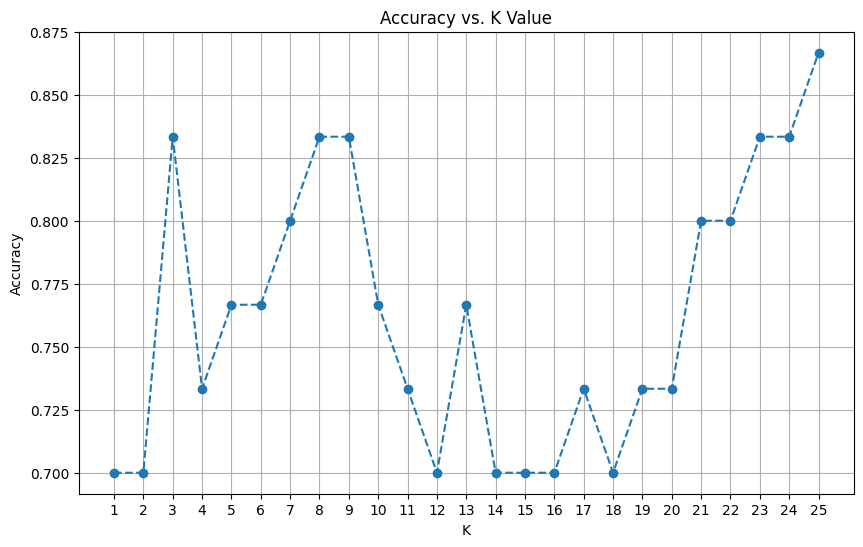

In [4]:
# Find the best K value
k_range = range(1, 26)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Step 4: Evaluate Model with Optimal K
Let's pick the best K from our experiment (e.g., K=7, depending on the plot) and evaluate the model's performance using 

accuracy and a confusion matrix.

Final Model Accuracy with K=7: 0.80


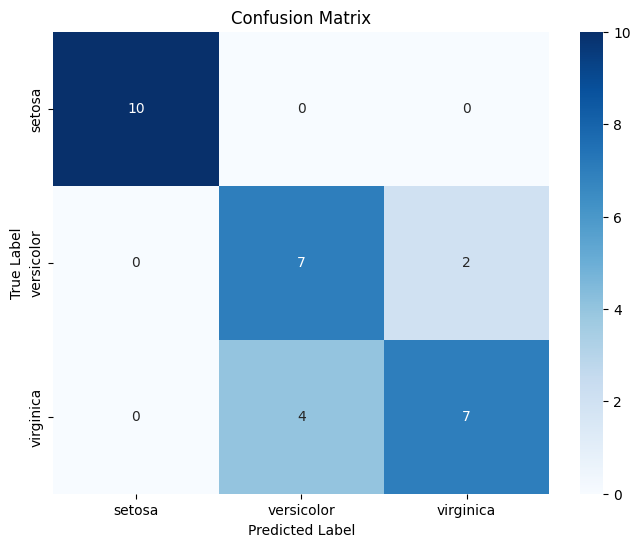

In [5]:
# Choose the optimal K based on the plot (let's assume it's K=7 for this example)
optimal_k = 7
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)

print(f"Final Model Accuracy with K={optimal_k}: {final_accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Step 5: Visualize Decision Boundaries
A decision boundary plot shows how the KNN model divides the feature space into regions for each class. This is a powerful way to understand how the model makes its predictions.

Interpretation: This plot shows the "territory" for each Iris species. Any new data point that falls within a colored region will be classified as belonging to that region's class.

C:\Users\gowra\AppData\Local\Temp\ipykernel_21416\2188455379.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


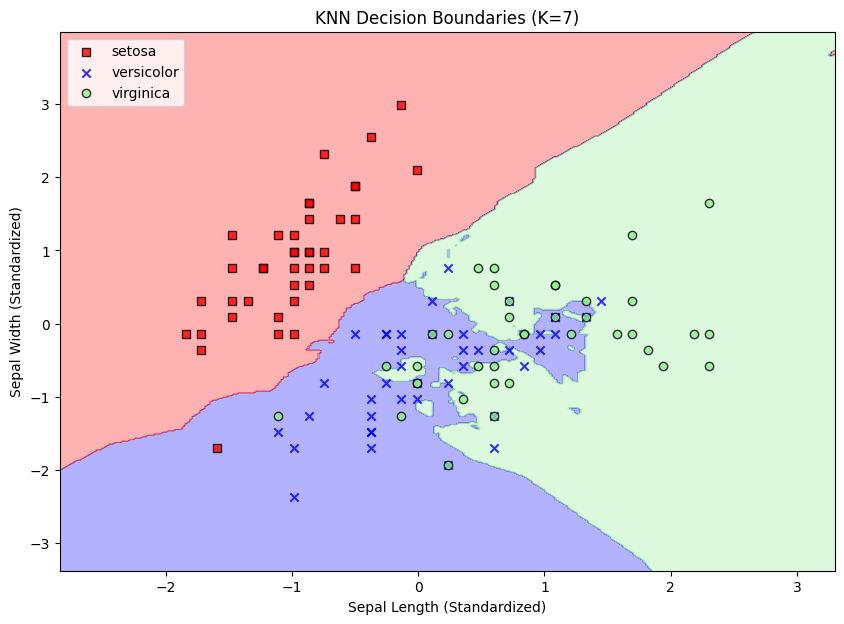

In [6]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl], 
                    edgecolor='black')

# Plotting decision boundaries for our final KNN model
plt.figure(figsize=(10, 7))
plot_decision_boundaries(X_train_scaled, y_train, classifier=final_knn)
plt.title(f'KNN Decision Boundaries (K={optimal_k})')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(loc='upper left')
plt.show()